**Data Understanding**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files

uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
df= pd.read_csv("./Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Visualization of Gender**

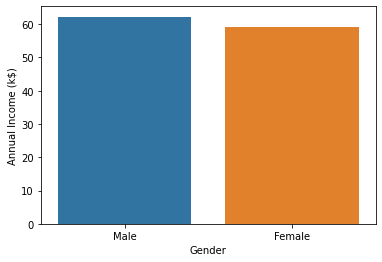

In [7]:
data1=df[["Gender", "Annual Income (k$)"]].groupby(['Gender'], as_index=False).mean().sort_values(by='Annual Income (k$)', ascending=False)
sns.barplot(x='Gender', y='Annual Income (k$)', data=data1)

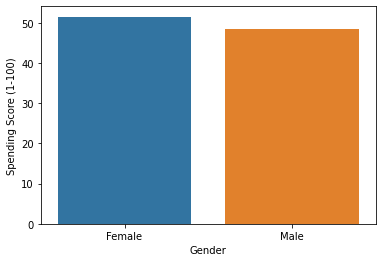

In [8]:
data2=df[["Gender", "Spending Score (1-100)"]].groupby(['Gender'], as_index=False).mean().sort_values(by='Spending Score (1-100)', ascending=False)
sns.barplot(x="Gender",y="Spending Score (1-100)",data=data2)

**Visualization of Age**

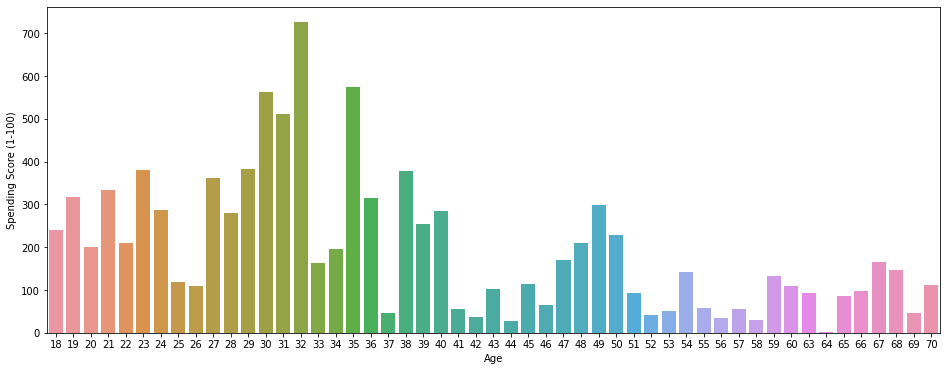

In [9]:
data3=df[["Age", "Spending Score (1-100)"]].groupby(['Age'], as_index=False).sum().\
                sort_values(by='Spending Score (1-100)', ascending=False)
plt.figure(figsize=[16,6])
sns.barplot(x="Age",y="Spending Score (1-100)",data=data3,orient="v")

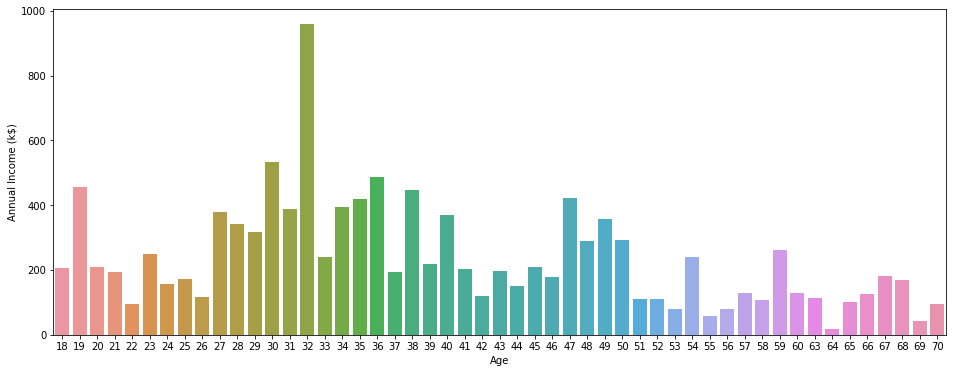

In [10]:
data4=df[["Age", "Annual Income (k$)"]].groupby(['Age'], as_index=False).sum().\
                sort_values(by='Annual Income (k$)', ascending=False)
plt.figure(figsize=[16,6])
sns.barplot(x="Age",y="Annual Income (k$)",data=data4)

**Understanding the Distributionn and Relation Between the Attributes**

[]

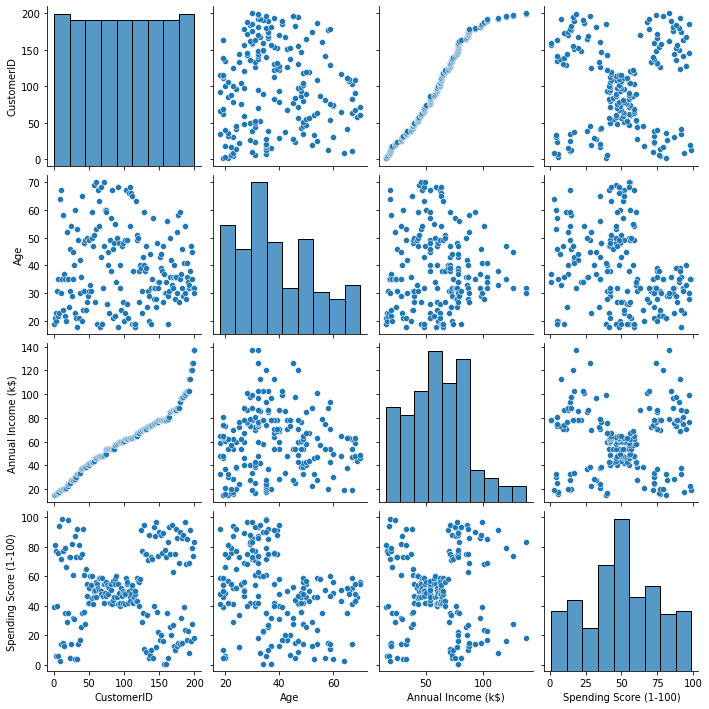

In [13]:
sns.pairplot(df)
plt.plot()

In [18]:
X = df.iloc[:, [3, 4]].values

**K-Means Clustering**

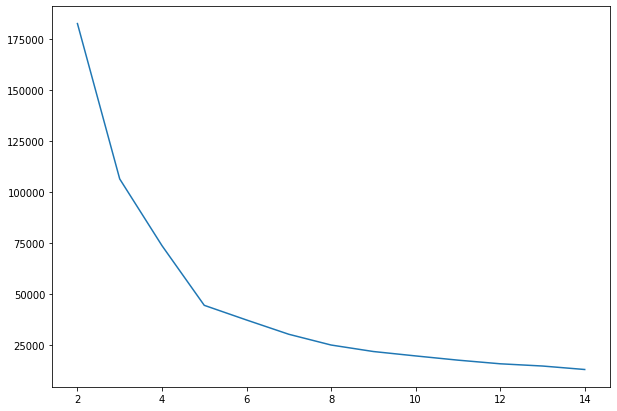

In [24]:
from sklearn.cluster import KMeans

history_inertia = list()
columns_cluster = [ [ "Spending Score (1-100)","Annual Income (k$)"]]
for i in range(2, 15):
    model = KMeans(n_clusters=i, random_state=10, n_jobs=-1)
    model.fit(df[columns_cluster[0]])
    history_inertia.append(model.inertia_)

plt.figure(figsize=(10,7))
plt.plot(np.arange(2,15), history_inertia)
plt.show()

5'te bükülme old. için en iyi küme sayısı budur. Buna göre K=5'tir. (Elbow Method)

Text(0, 0.5, 'Spending Score (1-100)')

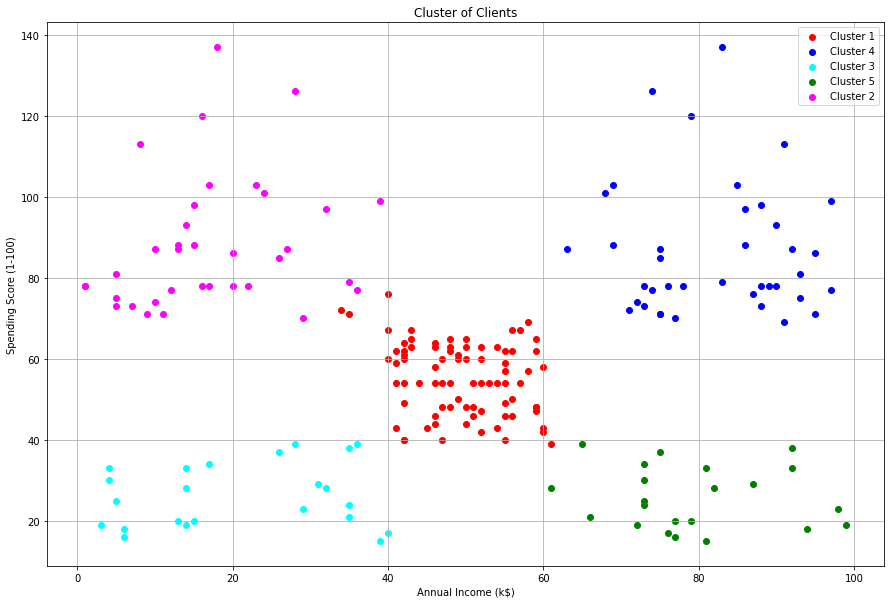

In [26]:
plt.figure(figsize=(15,10))
model = KMeans(n_clusters=5, random_state=10)
y_hat = model.fit_predict(df[columns_cluster[0]])

labels = ["Cluster 1", "Cluster 2", "Cluster 3",
          "Cluster 4", "Cluster 5"]

plt.scatter(df[y_hat == 0][columns_cluster[0][0]], df[y_hat == 0][columns_cluster[0][1]],c='red',label=labels[0])
plt.scatter(df[y_hat == 1][columns_cluster[0][0]], df[y_hat == 1][columns_cluster[0][1]],c='blue',label=labels[3])
plt.scatter(df[y_hat == 2][columns_cluster[0][0]], df[y_hat == 2][columns_cluster[0][1]],c='cyan',label=labels[2])
plt.scatter(df[y_hat == 3][columns_cluster[0][0]], df[y_hat == 3][columns_cluster[0][1]],c='green',label=labels[4])
plt.scatter(df[y_hat == 4][columns_cluster[0][0]], df[y_hat == 4][columns_cluster[0][1]],c='magenta',label=labels[1])
plt.legend()
plt.grid()
plt.title('Cluster of Clients')
plt.xlabel(columns_cluster[0][1])
plt.ylabel(columns_cluster[0][0])